In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv('D:/Mukunthan/ML Projects/DATASET/Retail_Sales_Data.csv')

df = pd.DataFrame(dataset)
df.head()

,Date,Home Decor,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend
0,01-01-2023,Electronics,North,497.95,17,0.98,116.07
1,02-01-2023,Clothing,South,271.31,34,3.28,96.66
2,03-01-2023,Groceries,East,563.73,26,5.83,51.71
3,04-01-2023,Home Decor,West,560.06,36,7.74,125.73
4,05-01-2023,Electronics,North,532.63,16,7.02,153.55


In [3]:
df.tail()

,Date,Home Decor,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend
95,06-04-2023,Home Decor,West,629.22,20,4.04,118.30
96,07-04-2023,Electronics,North,1034.74,20,8.74,133.00
97,08-04-2023,Clothing,South,536.78,28,5.58,133.79
98,09-04-2023,Groceries,East,488.79,24,3.70,56.26
99,10-04-2023,Home Decor,West,759.06,23,5.98,82.34


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             100 non-null    object 
 1   Home Decor       100 non-null    object 
 2   Region           100 non-null    object 
 3   Sales_Amount     100 non-null    float64
 4   Units_Sold       100 non-null    int64  
 5   Discount         100 non-null    float64
 6   Marketing_Spend  100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


In [5]:
df.isnull().sum()

Date               0
Home Decor         0
Region             0
Sales_Amount       0
Units_Sold         0
Discount           0
Marketing_Spend    0
dtype: int64

In [6]:
df.describe()

,Sales_Amount,Units_Sold,Discount,Marketing_Spend
count,100.000000,100.000000,100.000000,100.000000
mean,529.517100,20.830000,5.354500,108.388800
std,189.927471,9.242037,2.580002,50.940046
min,44.490000,0.000000,0.190000,3.080000
25%,398.745000,15.000000,3.445000,74.742500
50%,527.050000,21.500000,5.455000,108.300000
75%,650.170000,26.250000,7.557500,138.305000
max,1034.740000,42.000000,9.880000,247.660000


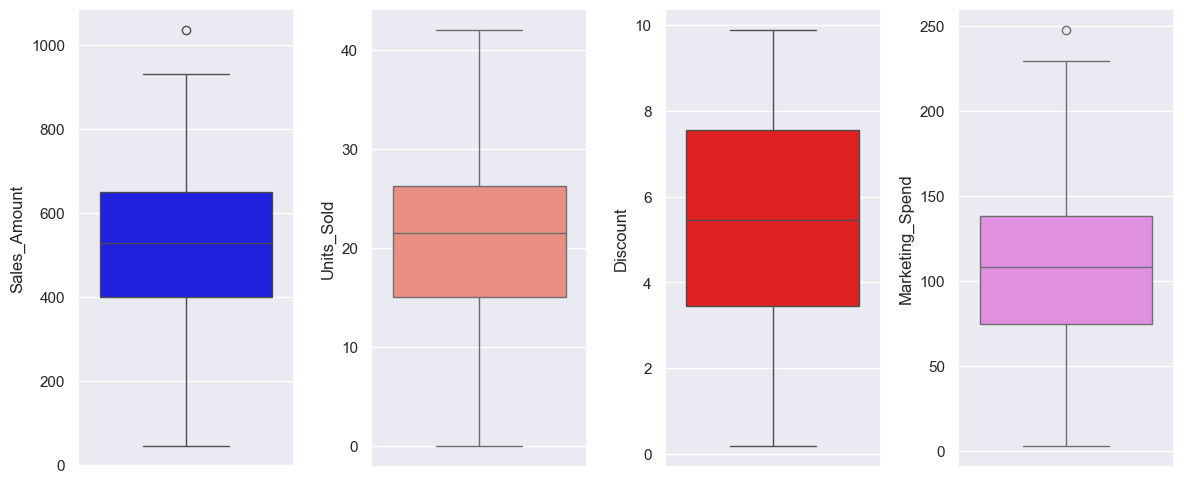

In [7]:
## Check for outliers

sns.set_theme()

plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
sns.boxplot(df['Sales_Amount'],color="blue")

plt.subplot(1,4,2)
sns.boxplot(df['Units_Sold'],color="salmon")

plt.subplot(1,4,3)
sns.boxplot(df['Discount'],color="red")

plt.subplot(1,4,4)
sns.boxplot(df['Marketing_Spend'],color="violet")

plt.tight_layout()

In [8]:
df.head()

,Date,Home Decor,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend
0,01-01-2023,Electronics,North,497.95,17,0.98,116.07
1,02-01-2023,Clothing,South,271.31,34,3.28,96.66
2,03-01-2023,Groceries,East,563.73,26,5.83,51.71
3,04-01-2023,Home Decor,West,560.06,36,7.74,125.73
4,05-01-2023,Electronics,North,532.63,16,7.02,153.55


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             100 non-null    object 
 1   Home Decor       100 non-null    object 
 2   Region           100 non-null    object 
 3   Sales_Amount     100 non-null    float64
 4   Units_Sold       100 non-null    int64  
 5   Discount         100 non-null    float64
 6   Marketing_Spend  100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


In [10]:
df.describe()

,Sales_Amount,Units_Sold,Discount,Marketing_Spend
count,100.000000,100.000000,100.000000,100.000000
mean,529.517100,20.830000,5.354500,108.388800
std,189.927471,9.242037,2.580002,50.940046
min,44.490000,0.000000,0.190000,3.080000
25%,398.745000,15.000000,3.445000,74.742500
50%,527.050000,21.500000,5.455000,108.300000
75%,650.170000,26.250000,7.557500,138.305000
max,1034.740000,42.000000,9.880000,247.660000


In [11]:
df.head()

,Date,Home Decor,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend
0,01-01-2023,Electronics,North,497.95,17,0.98,116.07
1,02-01-2023,Clothing,South,271.31,34,3.28,96.66
2,03-01-2023,Groceries,East,563.73,26,5.83,51.71
3,04-01-2023,Home Decor,West,560.06,36,7.74,125.73
4,05-01-2023,Electronics,North,532.63,16,7.02,153.55


In [12]:
df.rename({"Home Decor":"Product_Category"},axis=1,inplace=True)

In [13]:
aggregated_df = df.groupby(
    by=['Region','Product_Category'],as_index=False
).agg(
    total_sales = ('Sales_Amount',"sum"),
    Average_units_sold = ("Units_Sold","mean"),
)

In [14]:
aggregated_df

,Region,Product_Category,total_sales,Average_units_sold
0,East,Groceries,14895.49,21.60
1,North,Electronics,13517.29,19.20
2,South,Clothing,11513.27,19.32
3,West,Home Decor,13025.66,23.20


In [15]:
df

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend
0,01-01-2023,Electronics,North,497.95,17,0.98,116.07
1,02-01-2023,Clothing,South,271.31,34,3.28,96.66
2,03-01-2023,Groceries,East,563.73,26,5.83,51.71
3,04-01-2023,Home Decor,West,560.06,36,7.74,125.73
4,05-01-2023,Electronics,North,532.63,16,7.02,153.55
...,...,...,...,...,...,...,...
95,06-04-2023,Home Decor,West,629.22,20,4.04,118.30
96,07-04-2023,Electronics,North,1034.74,20,8.74,133.00
97,08-04-2023,Clothing,South,536.78,28,5.58,133.79
98,09-04-2023,Groceries,East,488.79,24,3.70,56.26


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Product_Category  100 non-null    object 
 2   Region            100 non-null    object 
 3   Sales_Amount      100 non-null    float64
 4   Units_Sold        100 non-null    int64  
 5   Discount          100 non-null    float64
 6   Marketing_Spend   100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [18]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023


In [19]:
df['month'] = df['Date'].dt.month
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1


In [20]:
df['day_of_week'] = df['Date'].dt.day_of_week
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3


In [21]:
df['Price_per_Unit'] = df['Sales_Amount'] / df['Units_Sold']
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week,Price_per_Unit
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6,29.291176
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0,7.979706
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1,21.681923
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2,15.557222
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3,33.289375


In [22]:
df['Discount_Percentage'] = (df['Discount'] / df['Sales_Amount']) * 100
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week,Price_per_Unit,Discount_Percentage
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6,29.291176,0.196807
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0,7.979706,1.208949
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1,21.681923,1.034183
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2,15.557222,1.381995
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3,33.289375,1.317988


In [23]:
df['Product_Category'].unique()

array(['Electronics', 'Clothing', 'Groceries', 'Home Decor'], dtype=object)

In [24]:
## Finding the Maximum SalesAmount for each product

max_sales_amount_df = df.groupby(
    by=['Product_Category','Region'],as_index=False
).agg(
    max_Sales_Amount = ('Sales_Amount',"max")
)

max_sales_amount_df

,Product_Category,Region,max_Sales_Amount
0,Clothing,South,857.71
1,Electronics,North,1034.74
2,Groceries,East,931.20
3,Home Decor,West,876.01


In [25]:
max_sales_amount_df['max_Sales_Amount'].values

array([ 857.71, 1034.74,  931.2 ,  876.01])

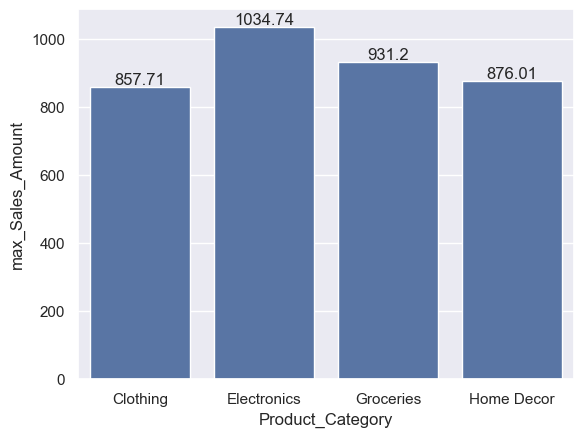

In [26]:
plot = sns.barplot(data=max_sales_amount_df,x='Product_Category', y='max_Sales_Amount')

plot.bar_label(plot.containers[0])
plt.show()

In [27]:
regional_sales_camparison_df = df.groupby(
    by='Region',as_index=False
).agg(
    Units_sold = ('Units_Sold',"sum")
)

regional_sales_camparison_df

,Region,Units_sold
0,East,540
1,North,480
2,South,483
3,West,580


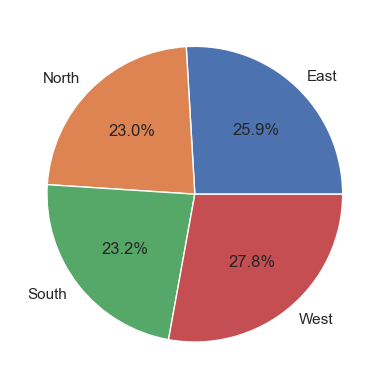

In [28]:
## Regional Sales Comparison

plt.pie(regional_sales_camparison_df['Units_sold'],autopct="%1.1f%%",labels=['East','North','South','West'])
plt.show()

In [29]:
monthly_trend_df = df.groupby(
    by='month',as_index=False
).agg(
    monthly_sales = ('Sales_Amount',"sum")
)

monthly_trend_df

,month,monthly_sales
0,1,15532.29
1,2,15331.78
2,3,15884.53
3,4,6203.11


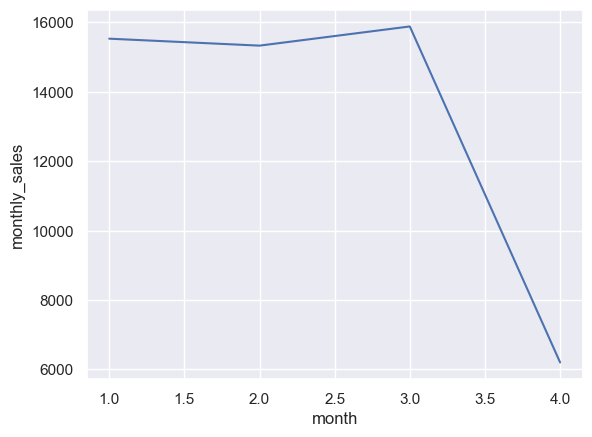

In [30]:
## Monthly Trend

sns.lineplot(data=monthly_trend_df,x='month',y='monthly_sales')
plt.show()

In [31]:
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week,Price_per_Unit,Discount_Percentage
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6,29.291176,0.196807
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0,7.979706,1.208949
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1,21.681923,1.034183
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2,15.557222,1.381995
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3,33.289375,1.317988


In [32]:


# correlation_df = df.drop("Region",axis=1)

correlation_df = df[['Discount','Sales_Amount','Marketing_Spend',"Units_Sold"]].copy()

In [33]:
correlation_df.head()

,Discount,Sales_Amount,Marketing_Spend,Units_Sold
0,0.98,497.95,116.07,17
1,3.28,271.31,96.66,34
2,5.83,563.73,51.71,26
3,7.74,560.06,125.73,36
4,7.02,532.63,153.55,16


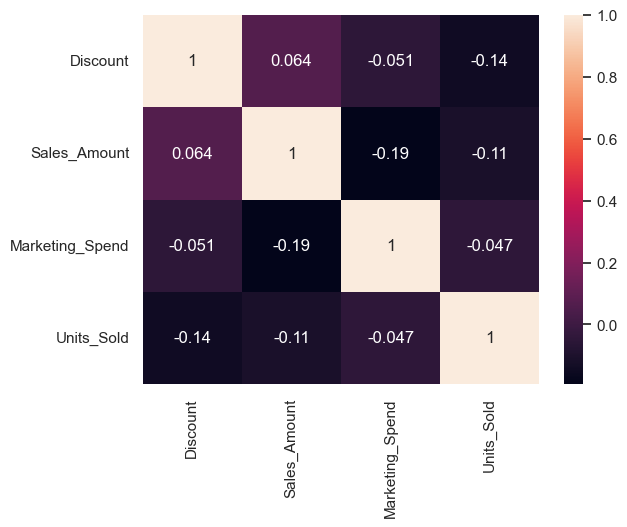

In [34]:
sns.heatmap(correlation_df.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Dicount vs Sales_Amount')

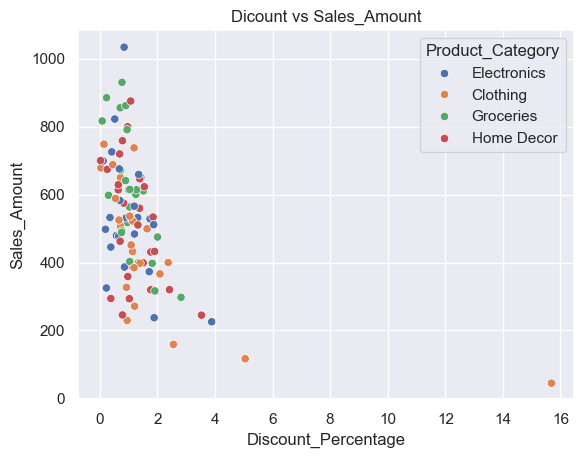

In [35]:
sns.scatterplot(data=df,x='Discount_Percentage',y='Sales_Amount',hue='Product_Category')
plt.title("Dicount vs Sales_Amount")

Text(0.5, 1.0, 'Product_Category vs Sales_Amount')

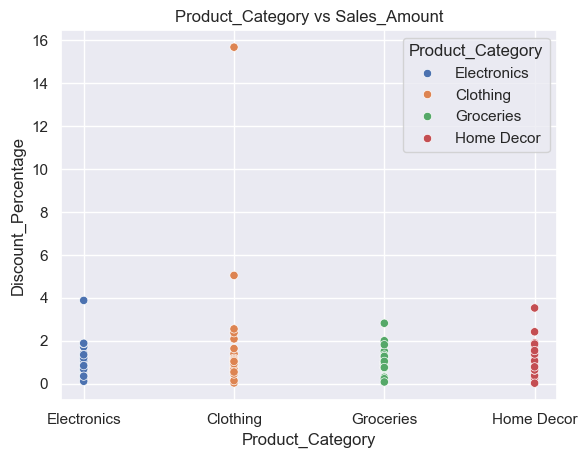

In [36]:
sns.scatterplot(data=df,x="Product_Category",y='Discount_Percentage',hue='Product_Category')
plt.title("Product_Category vs Sales_Amount")

In [37]:
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week,Price_per_Unit,Discount_Percentage
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6,29.291176,0.196807
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0,7.979706,1.208949
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1,21.681923,1.034183
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2,15.557222,1.381995
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3,33.289375,1.317988


In [38]:
discount_percentage_df = df.groupby(
    by='Product_Category',as_index=False
).agg(
    max_discount = ("Discount_Percentage","max")
)

discount_percentage_df

,Product_Category,max_discount
0,Clothing,15.688919
1,Electronics,3.885218
2,Groceries,2.820073
3,Home Decor,3.532631


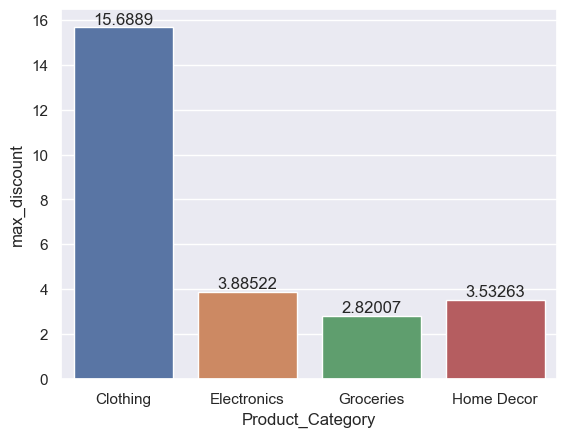

In [39]:
plot = sns.barplot(data=discount_percentage_df,x='Product_Category',y='max_discount',hue='Product_Category')
for i in plot.containers:
    plot.bar_label(i)

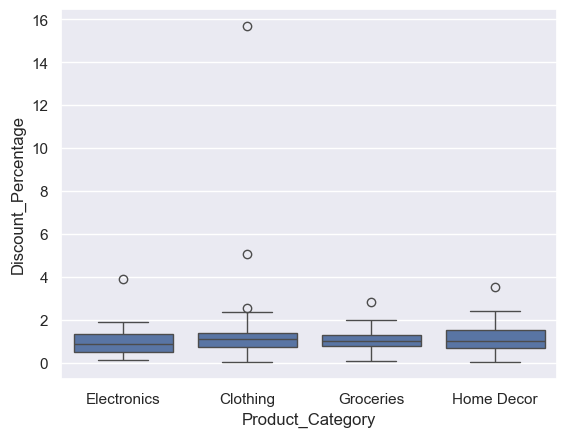

In [40]:
sns.boxplot(data=df,x='Product_Category',y='Discount_Percentage')
plt.show()

<Axes: xlabel='Marketing_Spend', ylabel='Sales_Amount'>

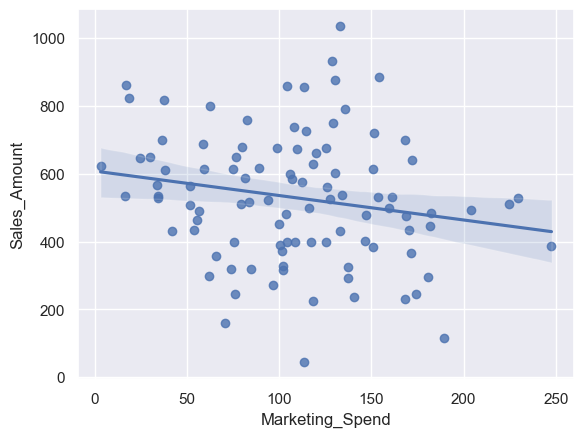

In [41]:
sns.regplot(data=df,x='Marketing_Spend',y='Sales_Amount')

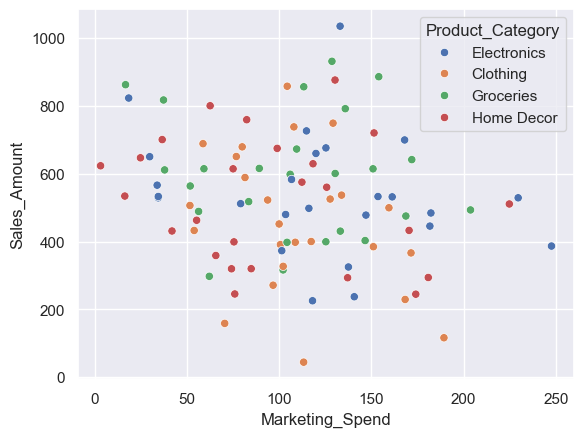

In [42]:
sns.scatterplot(data=df,x='Marketing_Spend',y='Sales_Amount',hue='Product_Category')
plt.show()

In [43]:
df['Marketing_Efficiency'] = df['Sales_Amount'] / df['Marketing_Spend']
df.head()

,Date,Product_Category,Region,Sales_Amount,Units_Sold,Discount,Marketing_Spend,Year,month,day_of_week,Price_per_Unit,Discount_Percentage,Marketing_Efficiency
0,2023-01-01,Electronics,North,497.95,17,0.98,116.07,2023,1,6,29.291176,0.196807,4.290084
1,2023-01-02,Clothing,South,271.31,34,3.28,96.66,2023,1,0,7.979706,1.208949,2.806849
2,2023-01-03,Groceries,East,563.73,26,5.83,51.71,2023,1,1,21.681923,1.034183,10.901760
3,2023-01-04,Home Decor,West,560.06,36,7.74,125.73,2023,1,2,15.557222,1.381995,4.454466
4,2023-01-05,Electronics,North,532.63,16,7.02,153.55,2023,1,3,33.289375,1.317988,3.468772


In [44]:
regional_marketing_df = df.groupby(
    by=['Region','Product_Category'],as_index=False
).agg(
    marketing_efficiency = ("Marketing_Efficiency","mean")
)

regional_marketing_df

,Region,Product_Category,marketing_efficiency
0,East,Groceries,8.391603
1,North,Electronics,7.722659
2,South,Clothing,4.891737
3,West,Home Decor,15.792202


In [45]:
scalar_df = df[['Units_Sold','Discount','Marketing_Spend','Price_per_Unit','Discount_Percentage','Marketing_Efficiency','Sales_Amount']].copy()
scalar_df.head()

,Units_Sold,Discount,Marketing_Spend,Price_per_Unit,Discount_Percentage,Marketing_Efficiency,Sales_Amount
0,17,0.98,116.07,29.291176,0.196807,4.290084,497.95
1,34,3.28,96.66,7.979706,1.208949,2.806849,271.31
2,26,5.83,51.71,21.681923,1.034183,10.901760,563.73
3,36,7.74,125.73,15.557222,1.381995,4.454466,560.06
4,16,7.02,153.55,33.289375,1.317988,3.468772,532.63


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print(scalar_df.isnull().sum())

print(np.isinf(scalar_df).sum())

scalar_df.replace([np.inf, -np.inf], np.nan, inplace=True)

scalar_df.dropna(inplace=True,axis=0)



Units_Sold              0
Discount                0
Marketing_Spend         0
Price_per_Unit          0
Discount_Percentage     0
Marketing_Efficiency    0
Sales_Amount            0
dtype: int64
Units_Sold              0
Discount                0
Marketing_Spend         0
Price_per_Unit          1
Discount_Percentage     0
Marketing_Efficiency    0
Sales_Amount            0
dtype: int64


In [47]:
np.isinf(scalar_df).sum()

Units_Sold              0
Discount                0
Marketing_Spend         0
Price_per_Unit          0
Discount_Percentage     0
Marketing_Efficiency    0
Sales_Amount            0
dtype: int64

In [48]:
scalar_df.isnull().sum()

Units_Sold              0
Discount                0
Marketing_Spend         0
Price_per_Unit          0
Discount_Percentage     0
Marketing_Efficiency    0
Sales_Amount            0
dtype: int64

In [49]:
scalar_df.shape

(99, 7)

In [50]:
y = scalar_df['Sales_Amount'].copy()
y.shape

(99,)

In [51]:
columns = scalar_df.columns
for col in columns:
    print(f"{col} shape: {scalar_df[col].shape}")

Units_Sold shape: (99,)
Discount shape: (99,)
Marketing_Spend shape: (99,)
Price_per_Unit shape: (99,)
Discount_Percentage shape: (99,)
Marketing_Efficiency shape: (99,)
Sales_Amount shape: (99,)


In [52]:
scalar_df.drop('Sales_Amount',axis=1,inplace=True)

In [53]:
scalar_df.head()

,Units_Sold,Discount,Marketing_Spend,Price_per_Unit,Discount_Percentage,Marketing_Efficiency
0,17,0.98,116.07,29.291176,0.196807,4.290084
1,34,3.28,96.66,7.979706,1.208949,2.806849
2,26,5.83,51.71,21.681923,1.034183,10.901760
3,36,7.74,125.73,15.557222,1.381995,4.454466
4,16,7.02,153.55,33.289375,1.317988,3.468772


In [84]:
scalar_df_scaled = scalar_df.copy()

In [85]:
scalar_df_scaled.head()

,Units_Sold,Discount,Marketing_Spend,Price_per_Unit,Discount_Percentage,Marketing_Efficiency
0,17,0.98,116.07,29.291176,0.196807,4.290084
1,34,3.28,96.66,7.979706,1.208949,2.806849
2,26,5.83,51.71,21.681923,1.034183,10.901760
3,36,7.74,125.73,15.557222,1.381995,4.454466
4,16,7.02,153.55,33.289375,1.317988,3.468772


In [86]:
scalar_df_scaled['Product_Category']=df['Product_Category']
scalar_df_scaled['Region']=df['Region']

In [87]:
scalar_df_scaled.head()

,Units_Sold,Discount,Marketing_Spend,Price_per_Unit,Discount_Percentage,Marketing_Efficiency,Product_Category,Region
0,17,0.98,116.07,29.291176,0.196807,4.290084,Electronics,North
1,34,3.28,96.66,7.979706,1.208949,2.806849,Clothing,South
2,26,5.83,51.71,21.681923,1.034183,10.901760,Groceries,East
3,36,7.74,125.73,15.557222,1.381995,4.454466,Home Decor,West
4,16,7.02,153.55,33.289375,1.317988,3.468772,Electronics,North


In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer([("encoder",OneHotEncoder(),['Product_Category','Region'])],remainder='passthrough')

new_df =  encoder.fit_transform(scalar_df_scaled)

In [89]:
new_df

array([[ 0.        ,  1.        ,  0.        , ..., 29.29117647,
         0.19680691,  4.29008357],
       [ 1.        ,  0.        ,  0.        , ...,  7.97970588,
         1.20894917,  2.80684875],
       [ 0.        ,  0.        ,  1.        , ..., 21.68192308,
         1.03418303, 10.90175981],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., 19.17071429,
         1.03953202,  4.01210853],
       [ 0.        ,  0.        ,  1.        , ..., 20.36625   ,
         0.7569713 ,  8.68805546],
       [ 0.        ,  0.        ,  0.        , ..., 33.0026087 ,
         0.78781651,  9.21860578]])

In [91]:
x = new_df

In [62]:
x

array([[ 0.        ,  1.        ,  0.        , ..., 29.29117647,
         0.19680691,  4.29008357],
       [ 1.        ,  0.        ,  0.        , ...,  7.97970588,
         1.20894917,  2.80684875],
       [ 0.        ,  0.        ,  1.        , ..., 21.68192308,
         1.03418303, 10.90175981],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., 19.17071429,
         1.03953202,  4.01210853],
       [ 0.        ,  0.        ,  1.        , ..., 20.36625   ,
         0.7569713 ,  8.68805546],
       [ 0.        ,  0.        ,  0.        , ..., 33.0026087 ,
         0.78781651,  9.21860578]])

In [75]:
y = y.reshape(-1,1)
y = StandardScaler().fit_transform(y)

In [78]:
y[:5]

array([[-0.16428899],
       [-1.35781316],
       [ 0.18211949],
       [ 0.16279266],
       [ 0.01834169]])

In [76]:
x.shape,y.shape

((99, 14), (99, 1))

In [79]:
# Splitting the data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)
print(x.shape,x_train.shape,x_test.shape)


(99, 14) (79, 14) (20, 14)


In [92]:
st = StandardScaler()

x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

Model Building 

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



In [94]:
linear_model = LinearRegression().fit(x_train,y_train)
random_forest_model = RandomForestRegressor().fit(x_train,y_train)
svm_model = SVR().fit(x_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
linear_model_pred = linear_model.predict(x_test)
random_forest_model_pred = random_forest_model.predict(x_test)
svm_mode_pred=svm_model.predict(x_test)

In [96]:
linear_model_pred

array([[-0.4912489 ],
       [-0.25737553],
       [ 0.2626843 ],
       [ 0.22893727],
       [ 0.36624677],
       [-0.15818723],
       [-0.57370149],
       [ 0.23975892],
       [ 0.38414899],
       [-0.09578792],
       [-0.10222743],
       [ 2.36594755],
       [-0.96738228],
       [ 0.16020405],
       [-0.09659582],
       [-0.24571123],
       [ 3.31720333],
       [-0.43275571],
       [-0.15907431],
       [ 0.63740722]])

validation score on Test Data

In [103]:
from sklearn.metrics import mean_squared_error

linear_model_MSE = mean_squared_error(y_test,linear_model_pred)
random_forest_model_MSE = mean_squared_error(y_test,random_forest_model_pred)
svm_mode_MSE = mean_squared_error(y_test,svm_mode_pred)

print("linear_model_accuracy: ",linear_model_MSE  )
print("random_forest_model_accuracy: ",random_forest_model_MSE )
print("svm_mode_accuracy: ",svm_mode_MSE)

linear_model_accuracy:  1.5846413429227633
random_forest_model_accuracy:  0.43257521365620705
svm_mode_accuracy:  1.068501455801536


In [101]:
from sklearn.metrics import mean_absolute_error

linear_model_MAE = mean_absolute_error(y_test,linear_model_pred)
random_forest_model_MAE = mean_absolute_error(y_test,random_forest_model_pred)
svm_MAE = mean_absolute_error(y_test,svm_mode_pred)

print("linear_model_MAE: ",linear_model_MAE)
print("random_forest_model_MAE: ",random_forest_model_MAE)
print("svm_MAE:" ,svm_MAE)

linear_model_MAE:  0.968075486456353
random_forest_model_MAE:  0.5631852083433817
svm_MAE: 0.8621543822355855


In [106]:
from sklearn.metrics import r2_score

linear_model_r2 = r2_score(y_test,linear_model_pred)
random_forest_model_r2 = r2_score(y_test,random_forest_model_pred)
svm_r2 = r2_score(y_test,svm_mode_pred)

print("linear_model_r2: ",linear_model_r2)
print("random_forest_model_r2: ",random_forest_model_r2)
print("svm_r2:" ,svm_r2)

linear_model_r2:  -0.22410932670164074
random_forest_model_r2:  0.6658427751481888
svm_r2: 0.17460023147667403


Validation score on Testing data

In [112]:
train_linear_model = LinearRegression().fit(x_train,y_train)
train_random_forest_model = RandomForestRegressor().fit(x_train,y_train)
train_svm_model = SVR().fit(x_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
train_linear_pred = train_linear_model.predict(x_train)
train_random_forest_pred = train_random_forest_model.predict(x_train)
train_svm_pred = train_svm_model.predict(x_train)

In [114]:
train_linear_model_MSE = mean_squared_error(y_train,train_linear_pred)
train_random_forest_model_MSE = mean_squared_error(y_train,train_random_forest_pred)
train_svm_mode_MSE = mean_squared_error(y_train,train_svm_pred)

print("train_linear_model_accuracy: ",train_linear_model_MSE  )
print("train_random_forest_model_accuracy: ",train_random_forest_model_MSE )
print("svm_mode_accuracy: ",train_svm_mode_MSE)

train_linear_model_accuracy:  0.4645058033438338
train_random_forest_model_accuracy:  0.031418828393733375
svm_mode_accuracy:  0.3566729050294686


In [115]:
train_linear_model_MAE = mean_absolute_error(y_train,train_linear_pred)
train_random_forest_model_MAE = mean_absolute_error(y_train,train_random_forest_pred)
train_svm_mode_MAE = mean_absolute_error(y_train,train_svm_pred)

print("train_linear_model_accuracy: ",train_linear_model_MAE  )
print("train_random_forest_model_accuracy: ",train_random_forest_model_MAE )
print("svm_mode_accuracy: ",train_svm_mode_MAE)

train_linear_model_accuracy:  0.5830511646067995
train_random_forest_model_accuracy:  0.13777490924689226
svm_mode_accuracy:  0.4559749156465851


In [116]:
train_linear_model_r2 = r2_score(y_train,train_linear_pred)
train_random_forest_model_r2 = r2_score(y_train,train_random_forest_pred)
train_svm_mode_r2 = r2_score(y_train,train_svm_pred)

print("train_linear_model_accuracy: ",train_linear_model_r2  )
print("train_random_forest_model_accuracy: ",train_random_forest_model_r2 )
print("svm_mode_accuracy: ",train_svm_mode_r2)

train_linear_model_accuracy:  0.4977494820864333
train_random_forest_model_accuracy:  0.9660281470771864
svm_mode_accuracy:  0.6143446433021513


In [119]:
print("LinearRegression Model R2 score: ")
print(f"Training score: { train_linear_model_r2} , Testing score: {linear_model_r2}\n")
print("RandomForestRegressor Model R2 score: ")
print(f"Training score: { train_random_forest_model_r2} , Testing score: {random_forest_model_r2}\n")
print("SVR Model R2 score: ")
print(f"Training score: { train_svm_mode_r2} , Testing score: {svm_r2}")


LinearRegression Model: 
Training score: 0.4977494820864333 , Testing score: -0.22410932670164074

RandomForestRegressor Model: 
Training score: 0.9660281470771864 , Testing score: 0.6658427751481888

SVR Model: 
Training score: 0.6143446433021513 , Testing score: 0.17460023147667403


In [120]:
print("LinearRegression Model MAE score: ")
print(f"Training score: { train_linear_model_MAE} , Testing score: {linear_model_MAE}\n")
print("RandomForestRegressor Model MAE score: ")
print(f"Training score: { train_random_forest_model_MAE} , Testing score: {random_forest_model_MAE}\n")
print("SVR Model MAE score: ")
print(f"Training score: { train_svm_mode_MAE} , Testing score: {svm_MAE}")


LinearRegression Model MAE score: 
Training score: 0.5830511646067995 , Testing score: 0.968075486456353

RandomForestRegressor Model MAE score: 
Training score: 0.13777490924689226 , Testing score: 0.5631852083433817

SVR Model MAE score: 
Training score: 0.4559749156465851 , Testing score: 0.8621543822355855


In [121]:
print("LinearRegression Model MSE score: ")
print(f"Training score: { train_linear_model_MSE} , Testing score: {linear_model_MSE}\n")
print("RandomForestRegressor Model MSE score: ")
print(f"Training score: { train_random_forest_model_MSE} , Testing score: {random_forest_model_MSE}\n")
print("SVR Model MSE score: ")
print(f"Training score: { train_svm_mode_MSE} , Testing score: {svm_mode_MSE}")

LinearRegression Model MSE score: 
Training score: 0.4645058033438338 , Testing score: 1.5846413429227633

RandomForestRegressor Model MSE score: 
Training score: 0.031418828393733375 , Testing score: 0.43257521365620705

SVR Model MSE score: 
Training score: 0.3566729050294686 , Testing score: 1.068501455801536


The Both `MAE (Mean Absolute Error) `and` MSE (Mean Squared Error)` score for all three model's are higher in testing comparing to the Training. So there is chance of `Overfitting` in out model. To resolve this we can use either Lasso or Ridge techniques

In [123]:
from sklearn.linear_model import Lasso,Ridge

lasso = Lasso().fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)
print("R2 score:",r2_score(y_test,lasso_pred))
print("MSE score:",mean_squared_error(y_test,lasso_pred))
print("MAE score:",mean_absolute_error(y_test,lasso_pred))

R2 score: -0.002246969005327948
MSE score: 1.2974347537930113
MAE score: 0.8707044714318839


In [124]:
ridge = Ridge().fit(x_train,y_train)
ridge_pred = ridge.predict(x_test)
print("R2 score:",r2_score(y_test,ridge_pred))
print("MSE score:",mean_squared_error(y_test,ridge_pred))
print("MAE score:",mean_absolute_error(y_test,ridge_pred))

R2 score: -0.21138169653435934
MSE score: 1.5681650948290986
MAE score: 0.9672912060522094


In [129]:
new_y = df['Sales_Amount'].copy()
new_y = new_y.values
new_y = new_y.reshape(-1,1)
new_y = new_y.ravel()

In [136]:
from sklearn.model_selection import cross_val_score,GridSearchCV

linear_cross_val_score = cross_val_score(LinearRegression(),x,y,cv=5)
random_forest_cross_val_score = cross_val_score(RandomForestRegressor(),x,y,cv=5)
svm_cross_val_score = cross_val_score(SVR(),x,y,cv=5)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: 

In [131]:
linear_cross_val_score

array([ 0.34751458, -8.42059386,  0.33221059,  0.46595115, -5.00229249])

In [133]:
random_forest_cross_val_score

array([0.75720476, 0.74138717, 0.82514329, 0.77359162, 0.8118953 ])

In [134]:
svm_cross_val_score

array([0.44016313, 0.19418734, 0.07281133, 0.36768909, 0.20927327])

#### Random Forest model have highest Score among the 3 model's with : 82.51%